In [1]:
## EDA Using Vaders

In [2]:
import numpy as np
import pandas as pd

In [3]:
import nltk

In [4]:
import torch

In [5]:
df = pd.read_csv("Reviews.csv")

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Using Normal Nltk Bag of Words Approach 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.style.use("ggplot")

In [9]:
df["Score"].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [10]:
df.shape

(568454, 10)

In [11]:
df = df.head(500)

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


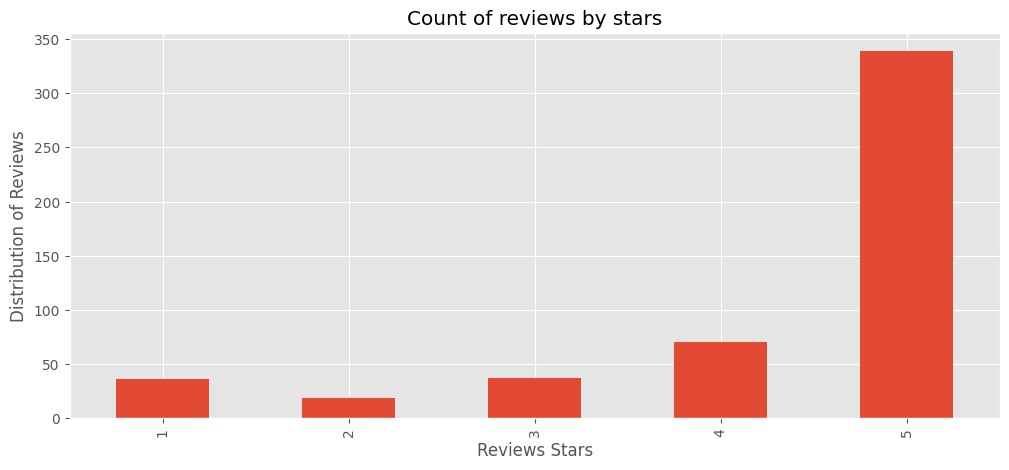

In [13]:
ax = (
    df["Score"]
    .value_counts()
    .sort_index()
    .plot(kind="bar", title="Count of reviews by stars", figsize=(12, 5))
)
ax.set_xlabel("Reviews Stars")
ax.set_ylabel("Distribution of Reviews")
plt.show()

In [15]:
example = df["Text"][50]

In [16]:
print(example)
tokens = nltk.word_tokenize(example)
print(tokens[:10])
tagged = nltk.pos_tag(tokens=tokens)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


# NN=> Singular Noun

In [17]:
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [22]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Disgustingly,grunted but not happy")

{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.612}

In [24]:
sia.polarity_scores("I am so horny and have a hard on")

{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.1027}

In [25]:
sia.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [26]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

# Run the polarity scores on the entire data set

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["Text"]
    myId = row["Id"]
    res[myId] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [29]:
vaders = pd.DataFrame(res).T
vaders
vaders = vaders.reset_index().rename(columns={"index": "Id"})

In [30]:
vaders.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [32]:
vaders = vaders.merge(df, how="left")

In [33]:
vaders.shape

(500, 14)

In [34]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [35]:
vaders["compound"].describe()

count    500.000000
mean       0.638864
std        0.460826
min       -0.972600
25%        0.570900
50%        0.842600
75%        0.938100
max        0.995700
Name: compound, dtype: float64

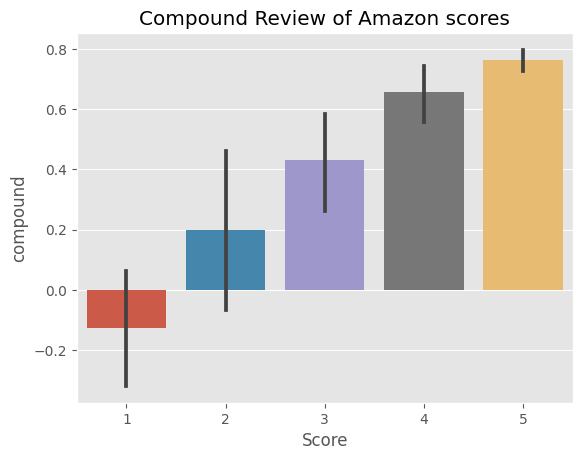

In [36]:
ax = sns.barplot(data=vaders, x="Score", y="compound")
ax.set_title("Compound Review of Amazon scores")
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

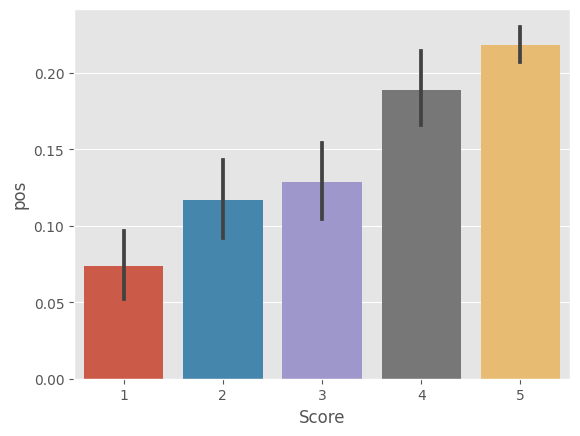

In [37]:
sns.barplot(data=vaders, x="Score", y="pos")

<Axes: xlabel='Score', ylabel='neg'>

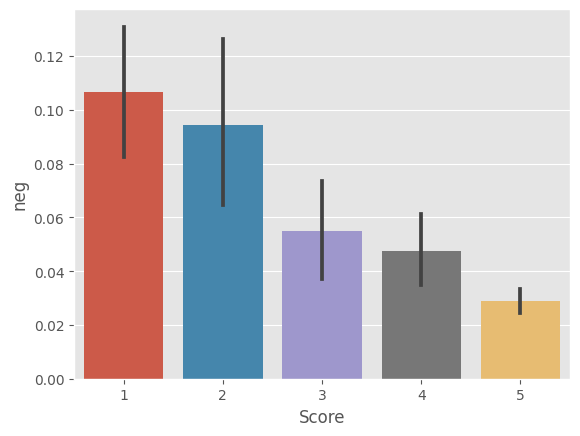

In [78]:
sns.barplot(data=vaders, x="Score", y="neg")

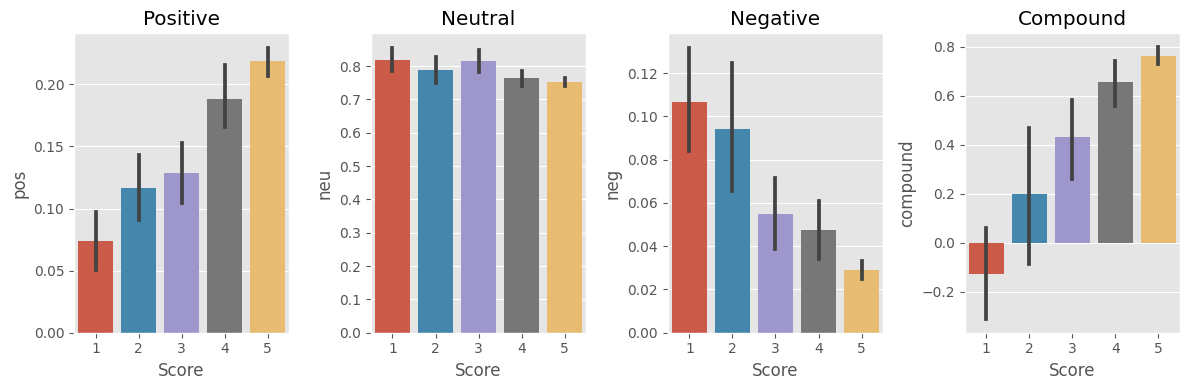

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
sns.barplot(data=vaders, x="Score", y="compound", ax=axs[3])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
axs[3].set_title("Compound")
plt.tight_layout()
plt.show()

# Using Transorfmers to compare bag of words

In [40]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [41]:
from scipy.special import softmax

In [42]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

In [47]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [45]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [44]:
import requests

url = "https://www.google.com"
requests.get(url)

<Response [200]>

In [49]:
print(example)
sia.polarity_scores(example)
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
output

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [50]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
print(scores)
scores_dict = {
    "roberta_neg": scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2],
}
scores_dict

[0.97635514 0.02068748 0.00295737]


{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687481,
 'roberta_pos': 0.0029573722}

In [51]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg": scores[0],
        "roberta_neu": scores[1],
        "roberta_pos": scores[2],
    }
    return scores_dict

In [52]:
pruned_df = df
res = {}
for i, row in tqdm(pruned_df.iterrows(), total=len(pruned_df)):
    try:
        text = row["Text"]
        myId = row["Id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for k, v in vader_result.items():
            vader_result_rename[f"vader_{k}"] = v
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myId] = both
    except RuntimeError as e:
        print(f"Broke for {myId}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for 83
Broke for 187


In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={"index": "Id"})
results_df = results_df.merge(pruned_df, how="left")

In [54]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [92]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

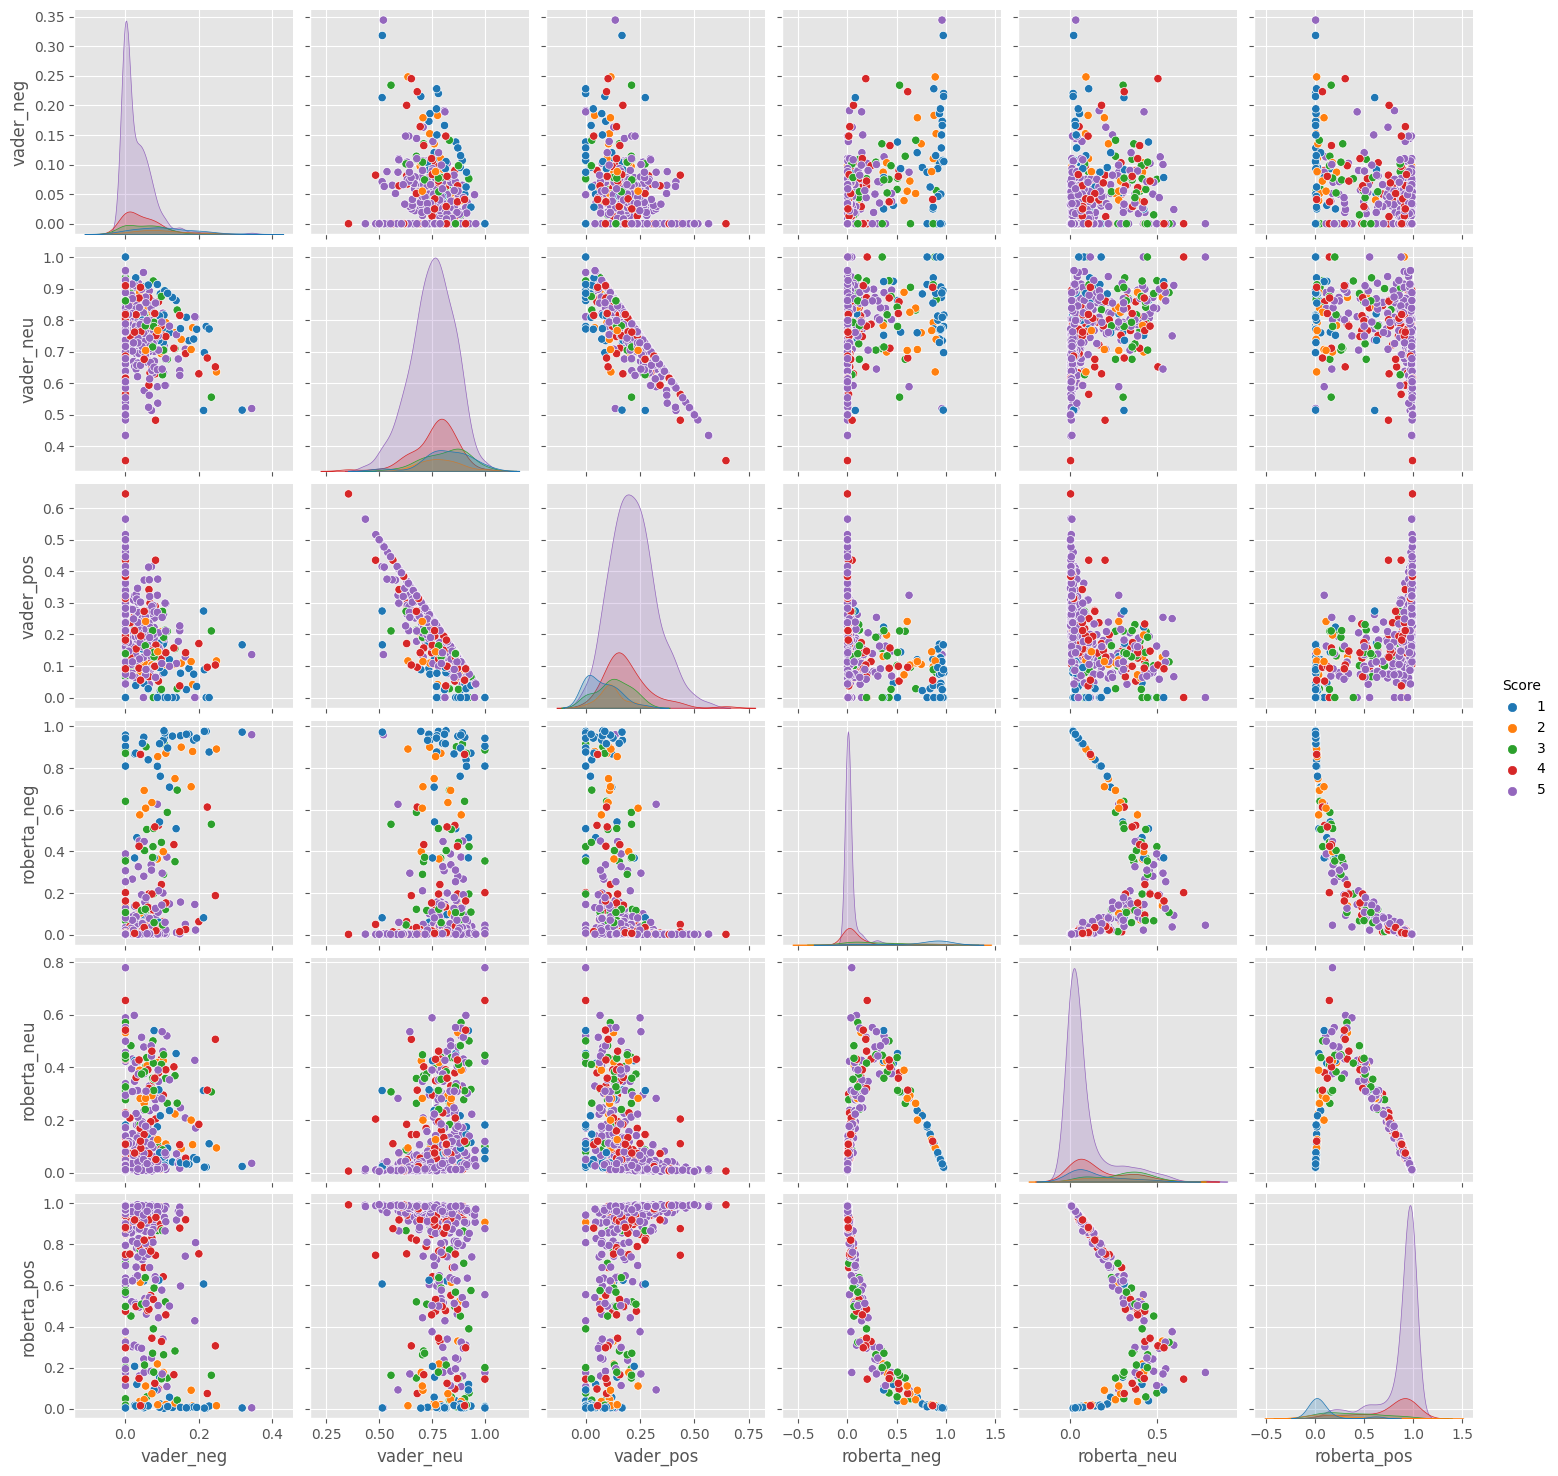

In [55]:
sns.pairplot(
    data=results_df,
    vars=[
        "vader_neg",
        "vader_neu",
        "vader_pos",
        "roberta_neg",
        "roberta_neu",
        "roberta_pos",
    ],
    hue="Score",
    palette="tab10",
)
plt.show()

In [64]:
results_df.query("Score ==1").sort_values("roberta_pos", ascending=False)[
    "Text"
].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [66]:
results_df.query("Score ==1").sort_values("vader_pos", ascending=False)["Text"].values[
    0
]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [71]:
print(
    results_df.query("Score ==1")
    .sort_values("vader_neg", ascending=False)["Text"]
    .values[0]
)
print(
    results_df.query("Score ==1")
    .sort_values("roberta_neg", ascending=False)["Text"]
    .values[0]
)

These condiments are overpriced and terrible. The classic is disgustingly sweet. The spiced tastes like a bad spicy marinara sauce from a chain restaurant.
I so wish I would have read this review before purchasing TWO gallons of this oil for my health issues. It reeks like a chemical rubber smell. This smell is coming from the black rubber gasket in the lid. When I called to report the situation to the company, Sabrina told me I would have to pay to send them a sample to have tested by a lab. Unbelievable. Good customer service would indicate that they would pay for the product to be returned and give me a full refund, including shipping. The product is faulty. Period. I will never order anything from this company again and do not recommend it to anyone based on this horrible customer service and lack of responsibility and ownership.


In [72]:
from transformers import pipeline

In [75]:
sentiment_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [76]:
!pip3 install xformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 1.8 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "/Users/ankster/Projects/Machine_Learning_Python/.venv/lib/python3.11/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Users/ankster/Projects/Machine_Learning_Python/.venv/lib/python3.11/site-packages/pip/_vendor/pypr

In [77]:
sentiment_analysis("I am very excited")

[{'label': 'POSITIVE', 'score': 0.9998397827148438}]

In [81]:
sentiment_analysis("I am watching sentiments")

[{'label': 'POSITIVE', 'score': 0.9977403879165649}]